In [47]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import ensemble
import time
from sklearn.metrics import classification_report , confusion_matrix

In [5]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100,resize = 0.4)

In [6]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [7]:
lfw.data.shape

(1140, 1850)

In [8]:
lfw.images.shape

(1140, 50, 37)

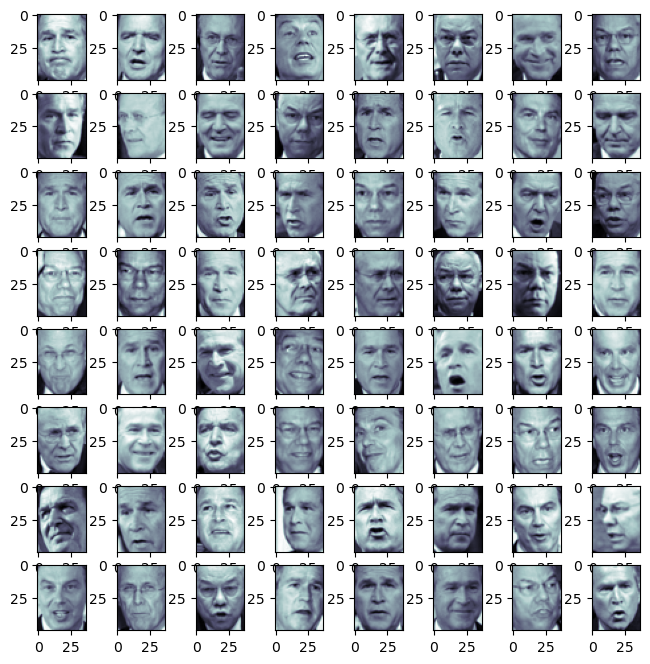

In [10]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i] ,cmap = plt.cm.bone)
plt.show()

In [26]:
x,y = lfw.data,lfw.target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
pca = PCA()
pca.fit(x_train)

PCA()

In [27]:
pca.components_.shape

(855, 1850)

In [28]:
k = 0
total = sum(pca.explained_variance_)
currsum = 0
while currsum/total < 0.99:
    currsum += pca.explained_variance_[k]
    k=k+1
k
    

357

In [32]:
pca_lfw = PCA(n_components = k,whiten = True)
x_transformed_data = pca_lfw.fit_transform(x_train)
x_transformed_data.shape


(855, 357)

In [33]:
x_approx = pca_lfw.inverse_transform(x_transformed_data)
x_approx.shape

(855, 1850)

In [34]:
x_approx_images = x_approx.reshape((855,50,37))

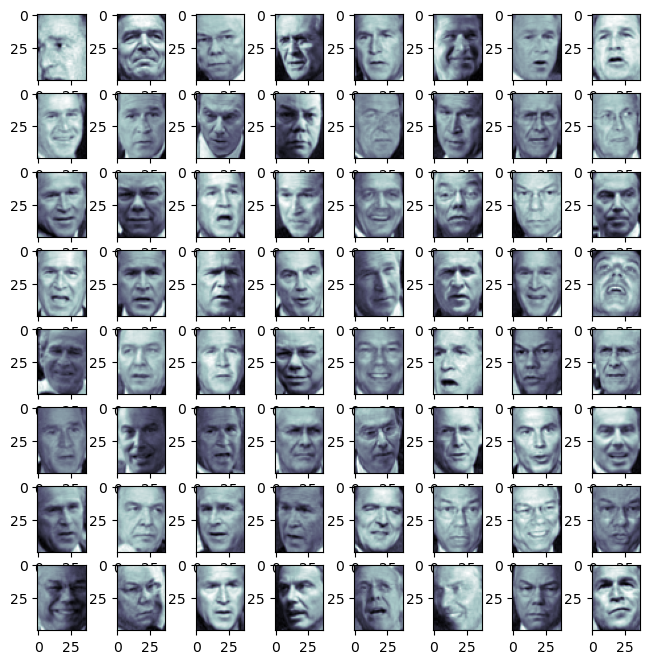

In [35]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i] ,cmap = plt.cm.bone)
plt.show()

In [36]:
eigenv = pca.components_
eigenv.shape

(855, 1850)

In [38]:
eigenfaces = eigenv.reshape((855,50,37))

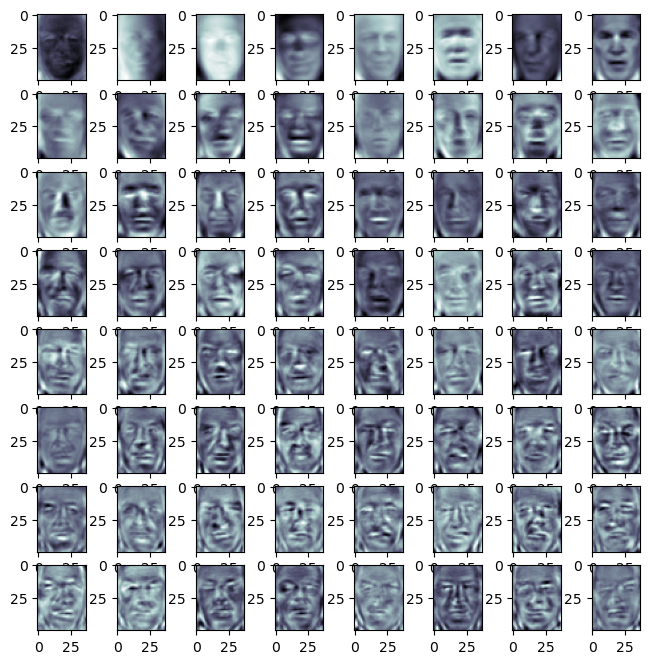

In [39]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i] ,cmap = plt.cm.bone)
plt.show()

In [41]:
x_train_pca=x_transformed_data
x_test_pca =pca_lfw.transform(x_test)

In [49]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred= rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

3.7093470096588135
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        61
           1       0.86      0.17      0.28        36
           2       0.59      0.99      0.74       122
           3       1.00      0.19      0.32        31
           4       0.85      0.31      0.46        35

    accuracy                           0.66       285
   macro avg       0.82      0.48      0.52       285
weighted avg       0.75      0.66      0.61       285

[[ 45   0  16   0   0]
 [  7   6  23   0   0]
 [  1   0 121   0   0]
 [  2   1  20   6   2]
 [  0   0  24   0  11]]


In [50]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred= rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

2.2720870971679688
              precision    recall  f1-score   support

           0       0.61      0.23      0.33        61
           1       0.00      0.00      0.00        36
           2       0.46      0.98      0.63       122
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        35

    accuracy                           0.47       285
   macro avg       0.21      0.24      0.19       285
weighted avg       0.33      0.47      0.34       285

[[ 14   0  46   1   0]
 [  5   0  31   0   0]
 [  2   0 120   0   0]
 [  1   0  30   0   0]
 [  1   0  34   0   0]]


C:\Users\tyagi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
